In [2]:
# adding dependencies
import os
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from config import omdb_key



In [3]:
path = "C:\\Users\\Derek\\Desktop\\"
file = os.path.join(path, "The-First-Project", "netflix_daily_top_10.csv")
netflix_df = pd.read_csv(file)
netflix_df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
netflix_df["Netflix Exclusive"] = netflix_df["Netflix Exclusive"].fillna("No")
netflix_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,No,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,"Mar 1, 2022",10,33


In [5]:
q2_2020 = netflix_df.loc[(netflix_df["As of"] >= "2020-04-01") & (netflix_df["As of"] <= "2020-06-30")]
count = q2_2020["Type"].value_counts()
count

TV Show            584
Movie              318
Stand-Up Comedy      8
Name: Type, dtype: int64

In [6]:
q2_2020_list = ["TV Show", "Movie", "Stand-Up Comedy"]
q2_2020_count = [584, 318, 8]
colors = ["lightgrey", "orange", "red"]
explode = (0, 0, 0.8)

(-1.1138123494776713,
 1.1080316181730232,
 -1.1476295618277752,
 1.923889055222787)

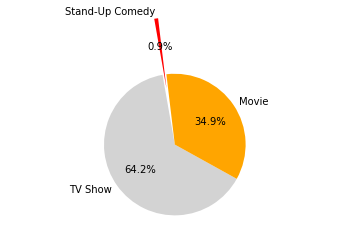

In [7]:
plt.pie(q2_2020_count, explode=explode, labels=q2_2020_list, colors=colors, autopct="%1.1f%%", startangle=100)
plt.axis("equal")

In [8]:
q2_2021 = netflix_df.loc[(netflix_df["As of"] >= "2021-04-01") & (netflix_df["As of"] <= "2021-06-30")]
count2 = q2_2021["Type"].value_counts()
count2

TV Show            552
Movie              356
Stand-Up Comedy      2
Name: Type, dtype: int64

In [9]:
q2_2021_list = ["TV Show", "Movie", "Stand-Up Comedy"]
q2_2021_count = [552, 356, 2]
colors = ["lightgrey", "orange", "red"]
explode = (0, 0, 0.8)

(-1.1057947086021842,
 1.1178838766065236,
 -1.1507648944479323,
 1.9152631708452996)

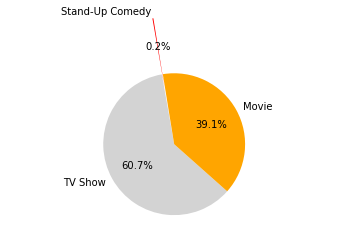

In [10]:
plt.pie(q2_2021_count, explode=explode, labels=q2_2021_list, colors=colors, autopct="%1.1f%%", startangle=100)
plt.axis("equal")

In [11]:
netflix_exclusive_tv = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
netflix_non_exclusive_tv = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "No") & (q2_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
netflix_exlusive_movie = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
netflix_non_exclusive_movie = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "No") & (q2_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
netflix_exlusive_comedy = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

In [12]:
exclusive_list = [netflix_exclusive_tv, netflix_non_exclusive_tv, netflix_exlusive_movie, netflix_non_exclusive_movie,
                netflix_exlusive_comedy]
exclusive_names = ["Netflix Exclusive TV Shows", "Netflix Non-Exclusive TV Shows", "Netflix Exclusive Movies",
                 "Netflix Non-Exclusive Movies", "Netflix Exclusive Comedy Specials"]
colors = ["lightgrey", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

([<matplotlib.patches.Wedge at 0x1d826db4f70>,
 [Text(-1.089236071387445, -0.1535082433892238, 'Netflix Exclusive TV Shows'),
  Text(0.6077463158792892, -0.9168666290879778, 'Netflix Non-Exclusive TV Shows'),
  Text(1.0991248048429787, 0.0438709856156018, 'Netflix Exclusive Movies'),
  Text(0.4616270163563959, 0.9984490461560329, 'Netflix Non-Exclusive Movies'),
  Text(-0.2781347259849153, 1.8795321423698228, 'Netflix Exclusive Comedy Specials')],
 [Text(-0.5941287662113335, -0.0837317691213948, '48.9%'),
  Text(0.3314979904796122, -0.5001090704116242, '15.3%'),
  Text(0.5995226208234429, 0.023929628517600977, '17.4%'),
  Text(0.2517965543762159, 0.5446085706305633, '17.6%'),
  Text(-0.20494137704151652, 1.3849184206935536, '0.9%')])

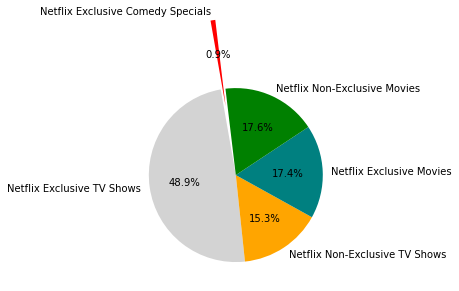

In [13]:
plt.pie(exclusive_list, explode=explode, labels=exclusive_names, colors=colors, autopct="%1.1f%%", startangle=100)

In [14]:
exclusive_tv = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
non_exclusive_tv = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "No") & (q2_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
exlusive_movie = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
non_exclusive_movie = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "No") & (q2_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
exlusive_comedy = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

In [15]:
exclusive_list_21 = [exclusive_tv, non_exclusive_tv, exlusive_movie, non_exclusive_movie, exlusive_comedy]
exclusive_names_21 = ["Netflix Exclusive TV Shows", "Netflix Non-Exclusive TV Shows", "Netflix Exclusive Movies",
                 "Netflix Non-Exclusive Movies", "Netflix Exclusive Comedy Specials"]
colors_21 = ["lightgrey", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

([<matplotlib.patches.Wedge at 0x1d826dcbe50>,
 [Text(-1.077685242513494, 0.22044164322702725, 'Netflix Exclusive TV Shows'),
  Text(0.1459839569620566, -1.0902700052325114, 'Netflix Non-Exclusive TV Shows'),
  Text(1.0999571892272029, 0.009704734277212792, 'Netflix Exclusive Movies'),
  Text(0.35952092457828977, 1.0395887190569029, 'Netflix Non-Exclusive Movies'),
  Text(-0.3170045178580341, 1.8733681260386588, 'Netflix Exclusive Comedy Specials')],
 [Text(-0.5878283140982694, 0.12024089630565121, '38.0%'),
  Text(0.0796276128883945, -0.5946927301268243, '22.6%'),
  Text(0.5999766486693834, 0.00529349142393425, '23.4%'),
  Text(0.19610232249724893, 0.567048392212856, '15.7%'),
  Text(-0.23358227631644612, 1.3803765139232222, '0.2%')])

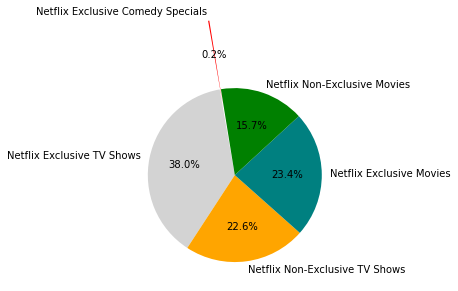

In [16]:
plt.pie(exclusive_list_21, explode=explode, labels=exclusive_names_21, colors=colors, autopct="%1.1f%%", startangle=100)

In [38]:
tv_show = q2_2020.loc[(q2_2020["Type"] == "TV Show") & (q2_2020["Netflix Exclusive"] == "Yes")]
title = tv_show["Title"].value_counts()
df = pd.DataFrame(title)[0:10]
df

,Title
Outer Banks,41
Ozark,40
"Tiger King: Murder, Mayhem …",27
Space Force,25
Dead to Me,25
13 Reasons Why,22
Jeffrey Epstein: Filthy Rich,21
Sweet Magnolias,19
Money Heist,16
Too Hot to Handle,15


<AxesSubplot:ylabel='Number of Days in Top 10 (Q2/20)'>

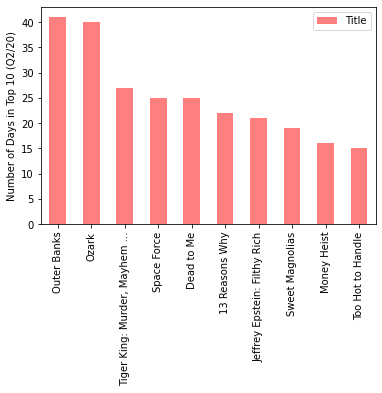

In [43]:
# not finalized yet but I was just checking to see if common tv shows from q2/2020 when compared to q2/2021
df.plot(kind="bar", ylabel="Number of Days in Top 10 (Q2/20)", color='r', alpha=0.5, align="center")

In [44]:
tv_show_21 = q2_2021.loc[(q2_2021["Type"] == "TV Show") & (q2_2021["Netflix Exclusive"] == "Yes")]
title_21 = tv_show_21["Title"].value_counts()
df_21 = pd.DataFrame(title_21)[0:10]
df_21

,Title
Who Killed Sara?,37
Sweet Tooth,26
The Circle US,25
The Serpent,25
Shadow and Bone,21
Jupiterâs Legacy,20
The Upshaws,16
Ragnarok,13
Selena: The Series,10
Ginny & Georgia,10


<AxesSubplot:ylabel='Number of Days in Top 10 (Q2/21)'>

C:\Users\Derek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Derek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Derek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Derek\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


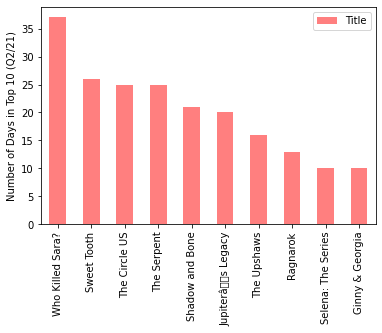

In [45]:
# not finalized yet but I was just checking to see if common tv shows from q2/2020 when compared to q2/2021
df_21.plot(kind="bar", ylabel="Number of Days in Top 10 (Q2/21)", color='r', alpha=0.5, align="center")